In [1]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#from MNE tutorial
data_path = sample.data_path()
raw_fname= data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname, preload=True)

In [ ]:
(raw.copy().pick_types(meg='mag')
           .del_proj(0)
           .plot(duration=60, n_channels=100, remove_dc=False))


In [2]:
#now trying to import kai's test data
ROOT = '/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/'
raw_file=ROOT+"kai-test-2.bdf"
raw=mne.io.read_raw_edf(raw_file,preload=True)

Extracting EDF parameters from /home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/kai-test-2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1915903  =      0.000 ...  3741.998 secs...


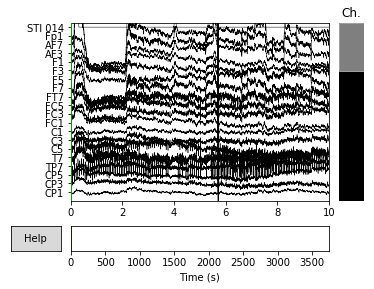

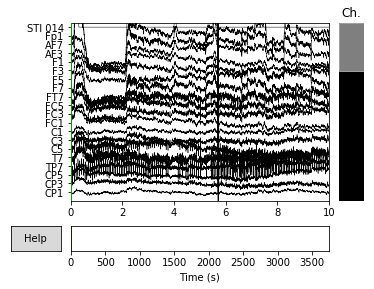

In [3]:
raw.plot()

Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 1691 samples (3.303 sec) selected


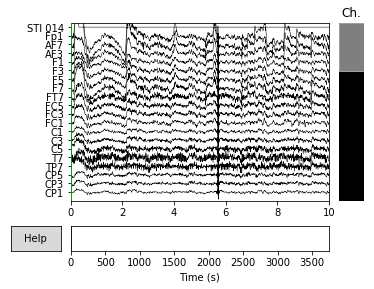

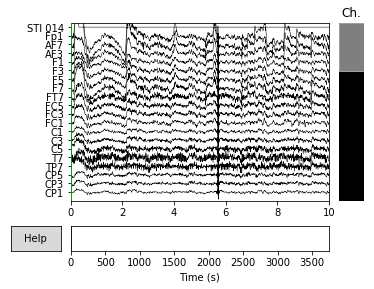

In [4]:
raw_f=raw.copy()
raw_f.filter(1,50)
raw_f.plot()

In [12]:
raw_fr=raw_f.copy()
raw_fr, r2 = mne.set_eeg_reference(raw_fr,ref_channels=['EXG1','EXG2'])

Applying a custom EEG reference.


<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : int | 1539341339
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTyp

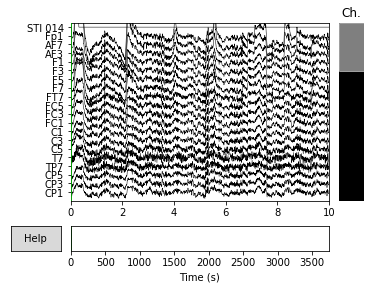

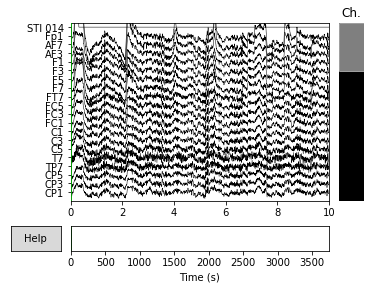

In [13]:
print(raw_fr.info)
raw_fr.plot()

In [14]:
events = mne.find_events(raw_fr, verbose=True)


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1980 events found
Event IDs: [101 103 105 107 109 111 113 115]


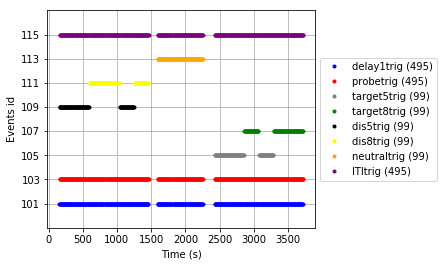

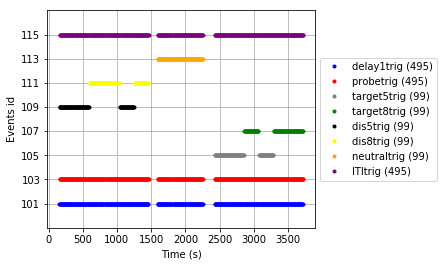

In [15]:
event_id = {'delay1trig':101,'probetrig':103,
            'target5trig':105,'target8trig':107,
            'dis5trig':109,'dis8trig':111,
            'neutraltrig':113,'ITItrig':115}
color= {101:'blue',103:'red',105:'grey',107:'green',
        109:'black',111:'yellow',113:'orange',115:'purple'}
mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,color=color,event_id=event_id)


In [16]:
event_id = {'target5trig':105}#,'target8trig':107} 
tmin, tmax = -0.5, 2  #dont remember the window, making this up
baseline = (None, 0.0)
epochs = mne.Epochs(raw_fr, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax)

99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 99 events and 1281 original time points ...
0 bad epochs dropped
Loading data for 20 events and 1281 original time points ...


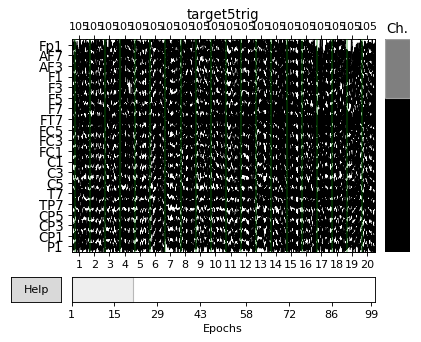

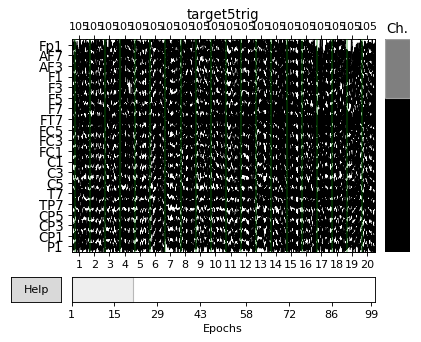

In [17]:
epochs.plot(block=True)

In [18]:
epochs.info


<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : int | 1539341339
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTyp

The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-60-b3395870871b>:4: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  raw_fr.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 14.0s.


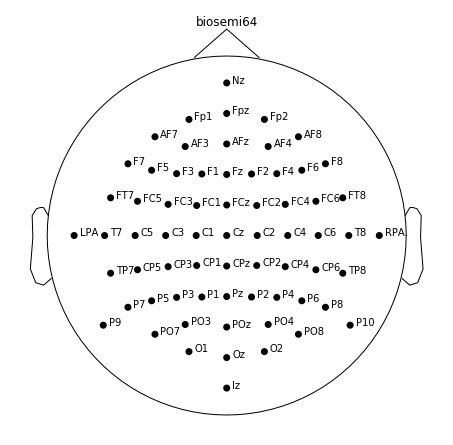

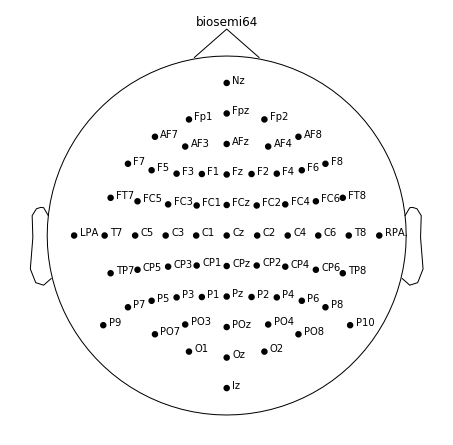

In [60]:
our_picks=mne.pick_types(raw_fr.info,meg=False,eeg=True,eog=False,exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
#layout=mne.channels.read_layout(kind='biosemi64.lout', path='/home/dcellier/AlphaStudy_Analysis')
layout=mne.channels.read_montage('biosemi64')
raw_fr.set_montage(layout)
ica = ICA(n_components=25,random_state=25)
ica.fit(raw_fr,picks=our_picks)
layout.plot()

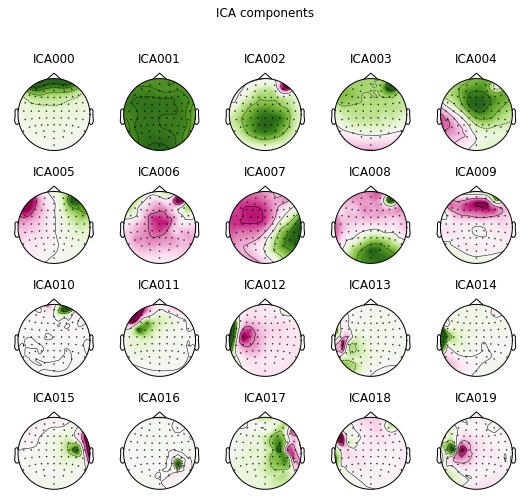

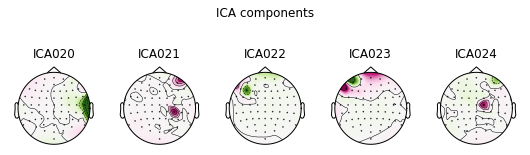

[<Figure size 540x504 with 20 Axes>, <Figure size 540x180 with 5 Axes>]

In [59]:
ica.plot_components(cmap='PiYG_r')

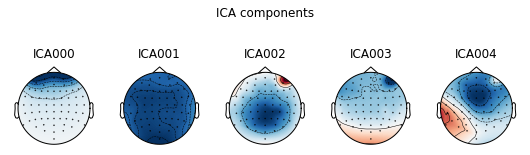

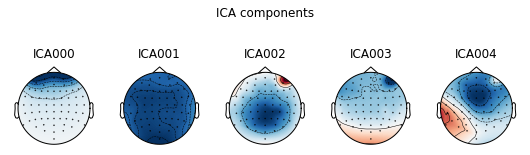

In [61]:
ica.plot_components(picks=range(5),inst=raw_fr)
